# 資料準備

In [0]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

In [0]:
from keras.datasets import mnist

In [0]:
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [36]:
print('train data=',len(x_train_image))
print(' test data=',len(x_test_image)

train data= 60000
 test data= 10000


In [37]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [0]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

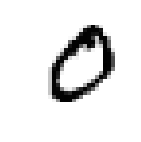

In [83]:
plot_image(x_train_image[1])

In [55]:
y_train_label[3]

1

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx=0,num=10):
    n=0
    j=0
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=100 
    for z in range(0,num):
      for i in range(0, num):
        if labels[idx] == n:
          ax=plt.subplot(1,10, 1+j)
          ax.imshow(images[idx], cmap='binary')
          title= "label=" +str(labels[idx])
          if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
          ax.set_title(title,fontsize=10) 
          ax.set_xticks([]);ax.set_yticks([])
          n+=1
          j+=1
        idx+=1
      
      
      
    
      
        
    plt.show()

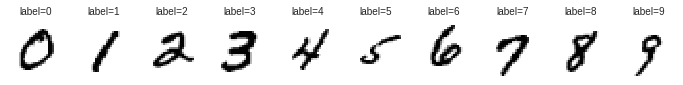

In [255]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)

In [43]:
print ('x_test_image:',x_test_image.shape)
print ('y_test_label:',y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


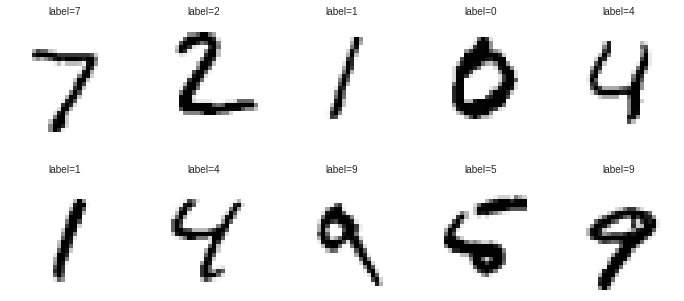

In [44]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

# 將images進行預處理

In [45]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [47]:
print ('x_train:',x_Train.shape)
print ('x_test:',x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [48]:
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
x_Train_normalize = x_Train/ 255
x_Test_normalize = x_Test/ 255

In [50]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# one hot encode outputs

In [51]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [0]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [53]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)